# Backpropagation
Backpropagation is an algorithm used to train neural networks by adjusting weights to minimize the error. It works by computing the gradient of the loss function with respect to each weight, moving backward from the output layer to the input layer using the chain rule. This helps the network learn which weights contribute most to the error and how to update them efficiently.

## Objective for this notebook
* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process

## Import Required Libraries

In [2]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs

In [3]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

## Declare the network params & weights

initial weights are rand nums which are then optimized by the backpropagation alg inside a function param `initialize_network_parameters`

In [4]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Training the NN
5 stages
1. Forward Pass
2. Error calculation
3. Backward Pass
4. Weights and bias updates
5. Training

In [5]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.49993
Epoch: 19999, Average error: 0.49743
Epoch: 29999, Average error: 0.06547
Epoch: 39999, Average error: 0.03299
Epoch: 49999, Average error: 0.02462
Epoch: 59999, Average error: 0.02042
Epoch: 69999, Average error: 0.01779
Epoch: 79999, Average error: 0.01595
Epoch: 89999, Average error: 0.01458
Epoch: 99999, Average error: 0.01350
Epoch: 109999, Average error: 0.01263
Epoch: 119999, Average error: 0.01190
Epoch: 129999, Average error: 0.01129
Epoch: 139999, Average error: 0.01076
Epoch: 149999, Average error: 0.01029
Epoch: 159999, Average error: 0.00988
Epoch: 169999, Average error: 0.00952
Epoch: 179999, Average error: 0.00919


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [6]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00857177 0.99035571 0.99035571 0.0089002 ]]
Ground truth [0 1 1 0]
Error after training: [[-0.0085718   0.00964432  0.00964432 -0.00890023]]
Average error: 0.00919


## Plot the Error

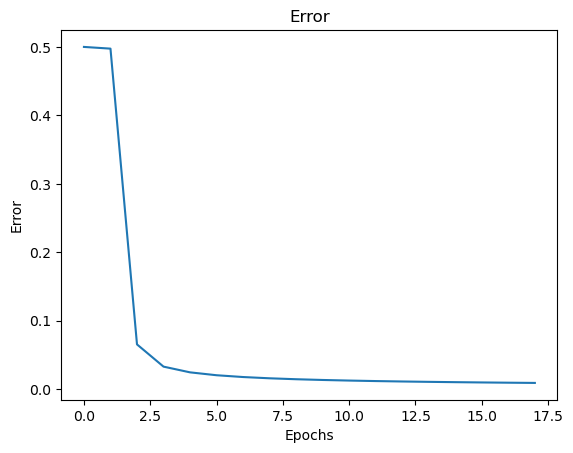

In [7]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## AND problem

Epoch: 9999, Average error: 0.02431
Epoch: 19999, Average error: 0.01549
Epoch: 29999, Average error: 0.01209
Epoch: 39999, Average error: 0.01020
Epoch: 49999, Average error: 0.00895
Epoch: 59999, Average error: 0.00806
Epoch: 69999, Average error: 0.00738
Epoch: 79999, Average error: 0.00684
Epoch: 89999, Average error: 0.00640
Epoch: 99999, Average error: 0.00603
Epoch: 109999, Average error: 0.00572
Epoch: 119999, Average error: 0.00545
Epoch: 129999, Average error: 0.00521
Epoch: 139999, Average error: 0.00500
Epoch: 149999, Average error: 0.00481
Epoch: 159999, Average error: 0.00464
Epoch: 169999, Average error: 0.00449
Epoch: 179999, Average error: 0.00435
Final output after training: [[4.20104281e-04 5.06189898e-03 5.07095892e-03 9.93150751e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00042011 -0.00506191 -0.00507097  0.00684927]]
Average error: 0.00435


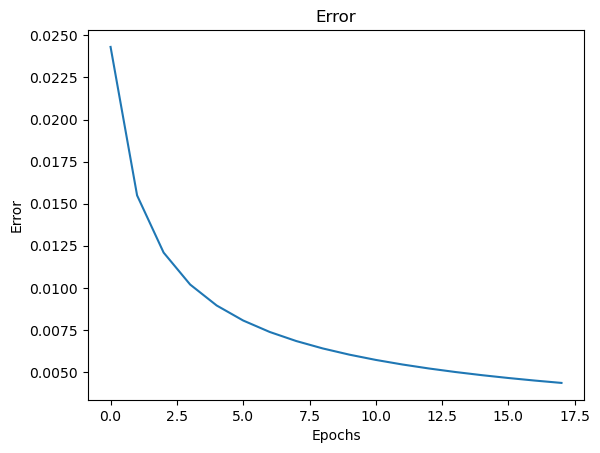

In [8]:
# Write your code here
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()